
# **Pipeline Architecture**


1. **Audio Input**:
   - Capture microphone input using libraries like `pyaudio` or `sounddevice`.

2. **Noise Reduction**:
   - Apply real-time noise suppression (e.g., WebRTC).

3. **Speech Recognition**:
   - Use lightweight, low-latency ASR models (e.g., Whisper Tiny, DeepSpeech).

4. **Post-Processing**:
   - Clean and interpret recognized text using NLP libraries (e.g., `spaCy`).

5. **Command Handling**:
   - Map text output to vehicle actions.


[guide-to-automatic-speech-recognition-technology](https://developer.nvidia.com/blog/essential-guide-to-automatic-speech-recognition-technology/)

# **Package Required**



```bash
sudo apt-get install libportaudio2 libportaudiocpp0 portaudio19-dev

pip install --upgrade sounddevice

import sounddevice as sd
```
```python
# Set the default device by its index (e.g., 12 in your case)
sd.default.device = 12
print(sd.query_devices())

```

# **Capturing Audio**

In [14]:
import sounddevice as sd
import numpy as np
import wave

# Set the default device by its index (e.g., 12 in your case)
sd.default.device = 12
print(sd.query_devices())


   0 HDA Intel PCH: ALC3246 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   4 sysdefault, ALSA (128 in, 128 out)
   5 front, ALSA (0 in, 2 out)
   6 surround40, ALSA (0 in, 2 out)
   7 surround51, ALSA (0 in, 2 out)
   8 surround71, ALSA (0 in, 2 out)
   9 hdmi, ALSA (0 in, 8 out)
  10 pipewire, ALSA (64 in, 64 out)
  11 dmix, ALSA (0 in, 2 out)
* 12 default, ALSA (64 in, 64 out)


## **Example for saving recorded audio**

In [39]:
# Callback function to process audio input
def audio_callback(indata, frames, time, status):
    """Callback function that processes audio data."""
    if status:
        print(f"Audio stream status: {status}")
    # Log raw audio data (you can process this as needed)
    print("Audio input received")


# Function to capture and save microphone input
def record_audio(filename, duration=5, samplerate=44100):
    """
    Records audio from the microphone for a given duration and saves it to a WAV file.
    :param filename: Path of the file to save recorded audio
    :param duration: Recording duration in seconds
    :param samplerate: Sample rate for recording
    """
    print("Recording started...")
    # Record audio stream
    audio_data = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=2, dtype="int16")
    sd.wait()  # Wait for recording to finish
    print("Recording finished. Saving file...")

    # Save audio data as WAV
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(2)  # Stereo audio
        wf.setsampwidth(2)  # Two bytes per sample
        wf.setframerate(samplerate)
        wf.writeframes(audio_data.tobytes())
    print(f"Saved audio to {filename}")


# Main function
def main():
    Recordded = "output.wav"
    record_audio(Recordded)


if __name__ == "__main__":
    main()


Recording started...
Recording finished. Saving file...
Saved audio to output.wav


## **Example for saving recordded array**

In [34]:
import sounddevice as sd
import numpy as np

# Record 5 seconds of audio
duration = 5  # seconds
fs = 44100  # Sample rate
print("Recording...")
recording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until the recording is done
print("Recording done")

# Playback the recorded audio
print("Playing back...")
sd.play(recording)
sd.wait()
print("Playback finished")


Recording...
Recording done
Playing back...
Playback finished


In [35]:
recording

array([[-0.8904687 , -0.8904687 ],
       [-1.0753561 , -1.0753561 ],
       [-0.94402635, -0.94402635],
       ...,
       [ 0.01741342, -0.21356899],
       [-0.01199941, -0.12143354],
       [ 0.05218137, -0.19072497]], dtype=float32)

## **Analyze or Visualize**

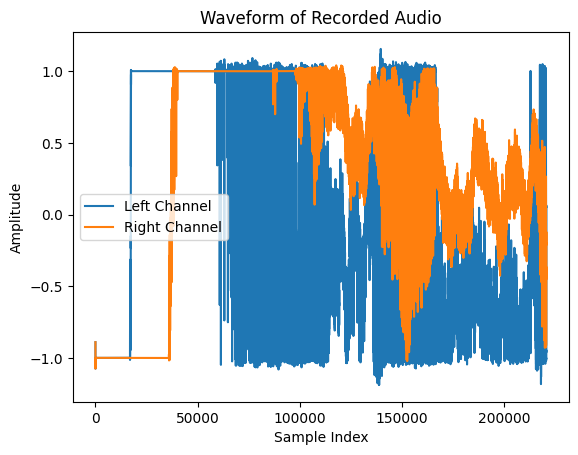

In [36]:
import matplotlib.pyplot as plt

# Plot left channel
plt.plot(recording[:, 0], label="Left Channel")
# Plot right channel
plt.plot(recording[:, 1], label="Right Channel")
plt.legend()
plt.title("Waveform of Recorded Audio")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


## **Amplify the Signal**

In [37]:
# Amplify the signal by 50%
amplified = recording * 1.5
sd.play(amplified)
sd.wait()


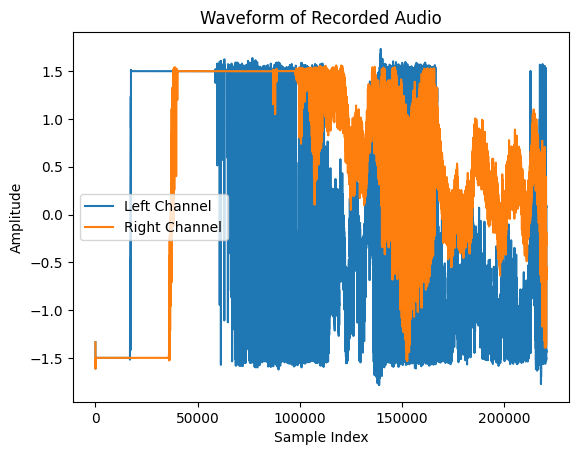

In [38]:
# Plot left channel
plt.plot(amplified[:, 0], label="Left Channel")
# Plot right channel
plt.plot(amplified[:, 1], label="Right Channel")
plt.legend()
plt.title("Waveform of Recorded Audio")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# **Noise Reduction**